Подробное объяснение кода, который создает анимацию Множества Мандельброта с изменяющимися цветами и формами:

# **Импорт Библиотек**
Эти строки импортируют необходимые библиотеки. **numpy** используется для математических операций, **matplotlib.pyplot** и **matplotlib.animation** для создания и анимации графиков, **matplotlib.cm** для работы с цветовыми картами, и **IPython.display.HTML** для отображения анимации в **Jupyter Notebook** или подобных средах.

# **Определение Функции Множества Мандельброта**
Эта функция вычисляет, принадлежит ли точка c к Множеству Мандельброта. **max_iter** - это максимальное количество итераций, а **power** - степень, в которую возводится число. Изменение **power** влияет на форму множества.

# **Создание Изображения Множества**
Эта функция создает двумерный массив значений, представляющий Множество Мандельброта. **xmin**, **xmax**, **ymin**, **ymax** задают область комплексной плоскости для визуализации. **width** и **height** определяют разрешение изображения.

# **Настройка Параметров и Создание Анимации**
Здесь задаются начальные параметры для Множества Мандельброта и создается анимация. Функция **update** вызывается для каждого кадра анимации. Она изменяет степень **power** и цветовую карту, что влияет на внешний вид Множества Мандельброта в каждом кадре.

# **Вывод Анимации**
Эта строка конвертирует анимацию в **HTML**-формат для отображения в **Jupyter Notebook** или аналогичных средах.

# **Использование Кода**
Для использования кода, его нужно скопировать и выполнить в **Jupyter Notebook** или другой среде, поддерживающей **matplotlib** и анимацию. Анимация покажет, как Множество Мандельброта меняет свою форму и цвет во времени.

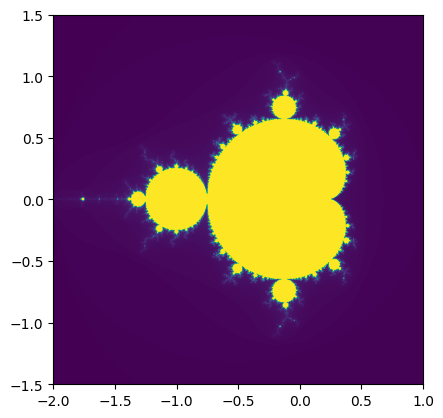

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import cm
from IPython.display import HTML

def mandelbrot(c, max_iter, power):
    z = 0
    for n in range(max_iter):
        if abs(z) > 2:
            return n
        z = z**power + c
    return max_iter

def mandelbrot_set(xmin, xmax, ymin, ymax, width, height, max_iter, power):
    x = np.linspace(xmin, xmax, width)
    y = np.linspace(ymin, ymax, height)
    mandelbrot_image = np.zeros((height, width))

    for i in range(height):
        for j in range(width):
            mandelbrot_image[i, j] = mandelbrot(complex(x[j], y[i]), max_iter, power)

    return mandelbrot_image

# Настройка параметров
xmin, xmax, ymin, ymax = -2.0, 1.0, -1.5, 1.5
width, height = 800, 800
max_iter = 200
powers = [2, 3, 4, 5, 6, 7]  # Различные степени для изменения формы

# Создание анимации
fig, ax = plt.subplots()
cmaps = ['viridis', 'plasma', 'inferno', 'magma', 'cividis', 'spring']

def update(frame):
    power = powers[frame % len(powers)]
    img.set_array(mandelbrot_set(xmin, xmax, ymin, ymax, width, height, max_iter, power))
    img.set_cmap(cmaps[frame % len(cmaps)])
    return [img]

img = ax.imshow(mandelbrot_set(xmin, xmax, ymin, ymax, width, height, max_iter, powers[0]), extent=[xmin, xmax, ymin, ymax], cmap='viridis')
ani = animation.FuncAnimation(fig, update, frames=len(powers) * 10, interval=500)

# Вывод анимации в виде HTML
HTML(ani.to_jshtml())
